# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**.

c) Calcule a correlação entre os dados transformados (média e diferença).

d) Comente as correlações observadas.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10 #50 valores de 0 a 1, multiplicados por 10. (logo, pertencem ao intervalo 0 a 10.)
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50) #50 valores de 0 a 1...
p2[p2>10] = 10 #...em que sua soma com p1 não possa ser maior que dez.
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [8]:
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


### Média e Diferença através da multiplicação matricial:

P1 e P2 são referentes à notas de prova. Utilizando multiplicação matricial iremos descobrir a média dessas notas e também sua diferença, que pode ser vista como o avanço que o aluno teve da primeira prova para a segunda. Dado que, posteriormente iremos utilizar de novo a multiplicação matricial, iremos criar apenas uma função em que o tamanho dos eixos poderá ser alterado para se adaptar melhor aos dados.

In [20]:
#função:
def transf_lin(m, xmin=-21, xmax=21, ymin=-21, ymax=21):

    # Definindo figura e configurando eixos
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)

    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax) + 1))
    ax.set_xticks(lista_xticks)
    ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax) + 1))
    ax.set_yticks(lista_yticks)
    ax.set_yticklabels(lista_yticks, fontsize='large')

    # Vetores coluna da matriz de transformação
    ax.arrow(0, 0, m[0, 0], m[1, 0],
             head_width=0.25,
             head_length=0.1,
             fc='g', ec='g',
             length_includes_head=True)

    ax.arrow(0, 0, m[0, 1], m[1, 1],
             head_width=0.25,
             head_length=0.1,
             fc='r', ec='r',
             length_includes_head=True)

    # Linhas horizontais e verticais de referência
    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    # Transformação linear
    df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

    # Plotar os dados originais
    plt.scatter(df['p1'], df['p2'], label='originais')

    # Plotar os dados transformados
    plt.scatter(df_rot[0, :], df_rot[1, :], label='transformados')

    # Legenda
    plt.legend(loc='lower right')

A matriz utilizada será a matriz anexada abaixo, confira. Quando realizamos a multiplicação dessa matriz pelos vetores x e y, obtemos exatamente 0.5x + 0.5y que é o equivalente a (x+y)/2, ou seja, através disso obtemos a média. Já na segunda linha da matriz resultante temos -x + y, que é o mesmo que y-x, logo, aqui obtemos a diferença. 

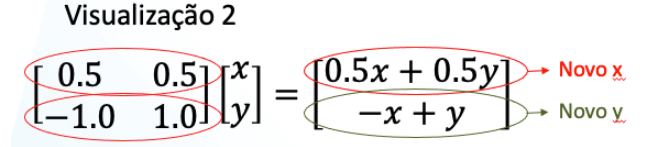

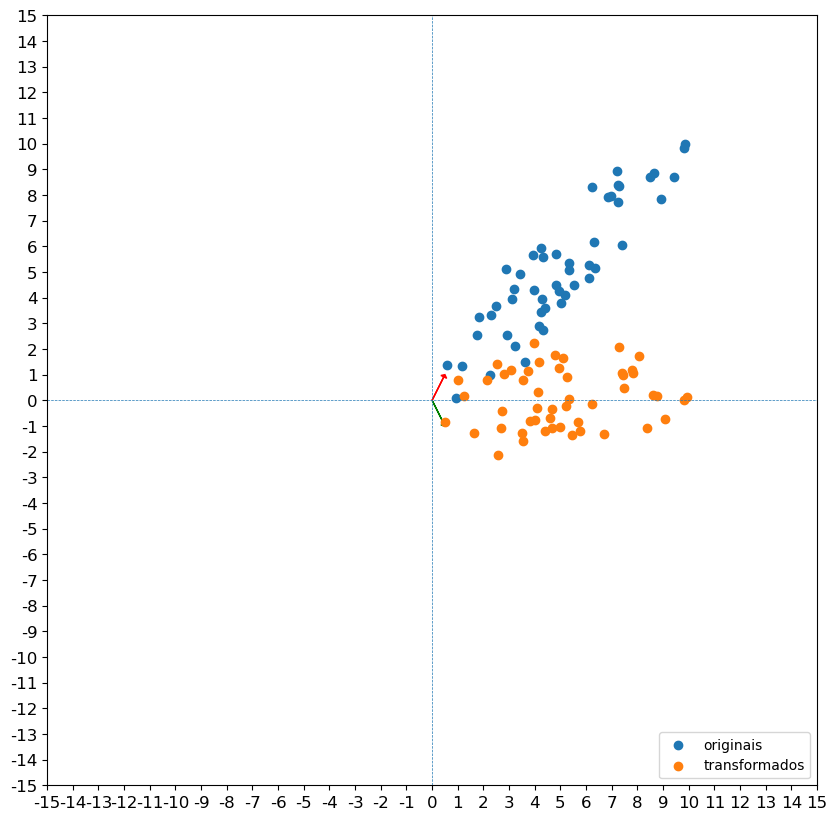

In [18]:
# Matriz de transformação
t = np.array([[0.5, 0.5],
              [-1, 1]])

# Chamando a função com valores personalizados
transf_lin(t, xmin=-15, xmax=15, ymin=-15, ymax=15)

In [21]:
# Cálculo da correlação entre p1 e p2
correlation = df['p1'].corr(df['p2'])
print(f'A correlação entre p1 e p2 é {correlation}')

A correlação entre p1 e p2 é 0.8957365818728046


In [25]:
# Cálculo da média entre p1 e p2
mean = (df['p1'] + df['p2']) / 2

# Cálculo da diferença entre p2 e p1
diferenca = df['p2'] - df['p1']

# Cálculo da correlação
correlation = mean.corr(diferenca)
print(f'A correlação entre a média e a diferença é {correlation}')

A correlação entre a média e a diferença é 0.13347385411788837


No gráfico acima temos a média localizada em x e a diferença localizada em y, se observarmos o gráfico, podemos dizer que a maioria dos alunos com média acima de 7, apresentou uma evolução nas notas, o que não ocorre em sua maioria com os alunos com a média abaixo desse valor. Entretanto, obtemos uma correlação baixa, que sugere que à medida que aumenta a média, levemente também aumenta a diferença, mas pelo gráficos podemos ver que esse aumento é bem aleatório. 

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

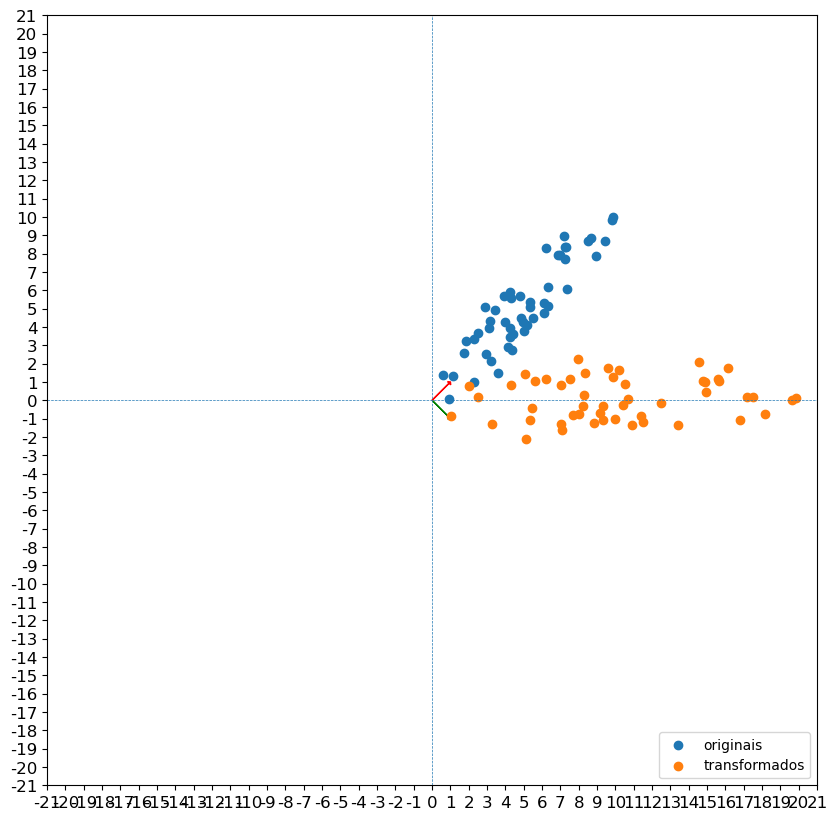

In [26]:
# Matriz de transformação
t = np.array([[1, 1],
              [-1, 1]])

# Chamando a função com valores personalizados
transf_lin(t, xmin=-21, xmax=21, ymin=-21, ymax=21)

In [30]:
# Cálculo da média entre p1 e p2
soma = (df['p1'] + df['p2'])

# Cálculo da diferença entre p2 e p1
diferenca = df['p2'] - df['p1']

# Cálculo da correlação
correlacao2 = soma.corr(diferenca)
print(f'A correlação entre a soma e a diferença é {correlacao2}')

A correlação entre a soma e a diferença é 0.13347385411788837


Ao observarmos a soma das notas com as diferenças, temos que alunos com soma de notas acima de 14, ou também podemos dizer, com média maior que 7, em sua maioria demonstraram uma evolução na nota, exatamente como observado no gráfico anterior. A correlação entre as duas, obviamente também é a mesma, mas como já dito, o aumento das notas não se dá linearmente o que explica a baixa correlação. 